# import

In [1]:
import pandas as pd
import numpy as np


from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular


from datetime import datetime, date, timezone
from datetime import datetime
from datetime import timedelta
from astropy.time import Time
from astropy.io import ascii

import time
import os
from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict



from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm
from astropy.table import Table


from collections import OrderedDict
from adjustText import adjust_text

In [2]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

## convert time

In [9]:
from astropy.time import Time
from astropy.io import fits
import time
import datetime
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

# mwa_5deg_cover

In [4]:
G0044_PKS0736_5deg=pd.read_csv('/Users/brettlv/blog/IHEP_sync/data/data_mwa/PKS0736/G0044_PKS0736_5deg.csv')

In [5]:
G0044_PKS0736_5deg

,Unnamed: 0,#obsid,#UTC,#duration,#obsname,#projectid,#RA,#Dec,#sun_elevation,#sun_pointing_distance,...,freq.14,freq.15,freq.16,freq.17,freq.18,freq.19,freq.20,freq.21,freq.22,freq.23
0,0,1209122856,2018-04-30 11:27:18,120,SKAEOR5_121,G0044,118.180169,5.232295,-23.513368,79.761483,...,123,124,125,126,127,128,129,130,131,132
1,1,1209122736,2018-04-30 11:25:18,120,SKAEOR5_93,G0044,117.678808,5.231527,-23.068537,79.278644,...,95,96,97,98,99,100,101,102,103,104
2,2,1209122616,2018-04-30 11:23:18,120,SKAEOR5_69,G0044,117.177448,5.230756,-22.623863,78.795755,...,71,72,73,74,75,76,77,78,79,80
3,3,1209122496,2018-04-30 11:21:18,120,SKAEOR5_169,G0044,116.676088,5.229981,-22.179351,78.312828,...,171,172,173,174,175,176,177,178,179,180
4,4,1209122376,2018-04-30 11:19:18,120,SKAEOR5_145,G0044,116.174729,5.229202,-21.735002,77.829841,...,147,148,149,150,151,152,153,154,155,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,1207652784,2018-04-13 11:06:06,120,SKAEOR5_145,G0044,117.737335,1.862343,-15.694219,95.876484,...,147,148,149,150,151,152,153,154,155,156
486,486,1207652664,2018-04-13 11:04:06,120,SKAEOR5_121,G0044,117.235999,1.861572,-15.251427,95.387417,...,123,124,125,126,127,128,129,130,131,132
487,487,1207652544,2018-04-13 11:02:06,120,SKAEOR5_93,G0044,116.734664,1.860798,-14.804993,94.894197,...,95,96,97,98,99,100,101,102,103,104
488,488,1207652424,2018-04-13 11:00:06,120,SKAEOR5_69,G0044,116.233329,1.860019,-14.358644,94.400961,...,71,72,73,74,75,76,77,78,79,80


In [6]:
for index,obsid in enumerate(G0044_PKS0736_5deg['#obsid']):
    mjd=Time(obsid, format='gps').mjd
    G0044_PKS0736_5deg.loc[index,'mjd']=mjd

In [7]:
G0044_PKS0736_5deg

,Unnamed: 0,#obsid,#UTC,#duration,#obsname,#projectid,#RA,#Dec,#sun_elevation,#sun_pointing_distance,...,freq.15,freq.16,freq.17,freq.18,freq.19,freq.20,freq.21,freq.22,freq.23,mjd
0,0,1209122856,2018-04-30 11:27:18,120,SKAEOR5_121,G0044,118.180169,5.232295,-23.513368,79.761483,...,124,125,126,127,128,129,130,131,132,58238.477720
1,1,1209122736,2018-04-30 11:25:18,120,SKAEOR5_93,G0044,117.678808,5.231527,-23.068537,79.278644,...,96,97,98,99,100,101,102,103,104,58238.476331
2,2,1209122616,2018-04-30 11:23:18,120,SKAEOR5_69,G0044,117.177448,5.230756,-22.623863,78.795755,...,72,73,74,75,76,77,78,79,80,58238.474942
3,3,1209122496,2018-04-30 11:21:18,120,SKAEOR5_169,G0044,116.676088,5.229981,-22.179351,78.312828,...,172,173,174,175,176,177,178,179,180,58238.473553
4,4,1209122376,2018-04-30 11:19:18,120,SKAEOR5_145,G0044,116.174729,5.229202,-21.735002,77.829841,...,148,149,150,151,152,153,154,155,156,58238.472164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,1207652784,2018-04-13 11:06:06,120,SKAEOR5_145,G0044,117.737335,1.862343,-15.694219,95.876484,...,148,149,150,151,152,153,154,155,156,58221.462998
486,486,1207652664,2018-04-13 11:04:06,120,SKAEOR5_121,G0044,117.235999,1.861572,-15.251427,95.387417,...,124,125,126,127,128,129,130,131,132,58221.461609
487,487,1207652544,2018-04-13 11:02:06,120,SKAEOR5_93,G0044,116.734664,1.860798,-14.804993,94.894197,...,96,97,98,99,100,101,102,103,104,58221.460220
488,488,1207652424,2018-04-13 11:00:06,120,SKAEOR5_69,G0044,116.233329,1.860019,-14.358644,94.400961,...,72,73,74,75,76,77,78,79,80,58221.458831


## min max mwa

In [8]:
min(G0044_PKS0736_5deg['mjd']),max(G0044_PKS0736_5deg['mjd'])

(58221.45744212963, 58238.47771990741)

In [10]:
convert_date_single(58221.45744212963)

datetime.datetime(2018, 4, 13, 10, 58, 43)

In [12]:
convert_date_single(58238.47771990741)

datetime.datetime(2018, 4, 30, 11, 27, 55)

datetime.datetime(2019, 10, 19, 0, 0)

## A New NIR flare of the Blazar PKS0736+017

In [ ]:
A New NIR flare of the Blazar PKS0736+017 ATel #11416; L. Carrasco, A. Porras, E. Recillas, V. Chavushyan, G. Escobedo, (INAOE, Mexico)
on 13 Mar 2018; 20:25 UT
Credential Certification: LUIS CARRASCO (carrasco@inaoep.mx)

Subjects: Radio, Infra-Red, Optical, Gamma Ray, AGN, Blazar, Quasar

Referred to by ATel #: 12733

In [37]:
convert_xaxis_mjd(datetime.datetime(2018, 3, 7,))

58184.0

## WISE peak

In [54]:
convert_date_single(58775)

datetime.datetime(2019, 10, 19, 0, 0)

## AGILE

AGILE is detecting increased gamma-ray emission in the soft energy band between 50 MeV and 400 MeV from a source at Galactic coordinates (l, b) =(216.3, 12.3) +/- 0.6 deg (95% stat. c.l.) +/- 0.5 deg (syst.) [R.A., Decl. (J2000) = 115.3, 2.6 deg], consistent with the flat spectrum radio quasar PKS 0736+01 (also known as BZQ J0739+0137), also associated with the gamma-ray source 3FGL J0739.4+0137.

Integrating from 2019-05-01 UT 13:50:00 until 2019-05-05 13:50:00, a preliminary maximum likelihood analysis yields a detection at the level of about 5 sigma and a flux F(50 MeV < E < 400 MeV) = (3.1 +/- 0.9) x 10^-6 ph/cm^2/s.

# LAT

In [14]:
PKS0736_86400=fits.open('/Volumes/ExtremeSSD/data_source/PKS0736+01/PKS0736+01_fermi/PKS0736+01_86400.lc')

In [15]:
PKS0736_86400data=PKS0736_86400[1].data

In [16]:
PKS0736_86400[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   70 / length of dimension 1                          
NAXIS2  =                 2461 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   16 / number of table fields                         
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** End of mandator

In [17]:
PKS0736_86400[1].data.columns

ColDefs(
    name = 'START'; format = 'D'; unit = 's'
    name = 'STOP'; format = 'D'; unit = 's'
    name = 'NAME'; format = '11A'
    name = 'RA'; format = 'E'; unit = 'deg'
    name = 'DEC'; format = 'E'; unit = 'deg'
    name = 'FLUX_1000_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'ERROR_1000_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'UL_1000_300000'; format = 'L'
    name = 'FLUX_300_1000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'ERROR_300_1000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'UL_300_1000'; format = 'L'
    name = 'FLUX_100_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'ERROR_100_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'UL_100_300000'; format = 'L'
    name = 'DURATION'; format = 'E'; unit = 's'
    name = 'TEST_STATISTIC'; format = 'E'
)

In [18]:
PKS0736_86400[1].header['MJDREFI']

51910.0

In [19]:
PKS0736_86400[1].header['MJDREFF']

'7.428703703703703D-4'

t_day=time_day/86400+lightcurve_day[1].header['MJDREFI']+7.428703703703703e-4

pd.DataFrame({'t':data_band[name_mjd],'flux':(-48.6-data_band[name_band]-delta_m_wise[i])/2.5,'err':data_band[name_err]/2.5},index=None,columns=['t','flux','err'])    

In [23]:
PKS0736_86400_pd=pd.DataFrame({})
PKS0736_86400_pd['flux_0']=PKS0736_86400data['FLUX_300_1000']
PKS0736_86400_pd['e_flux_0']=PKS0736_86400data['ERROR_300_1000']
PKS0736_86400_pd['mjd']=PKS0736_86400data['START']/86400+PKS0736_86400[1].header['MJDREFI']+7.428703703703703e-4

PKS0736_86400_pd['flux_1']=PKS0736_86400data['FLUX_100_300000']
PKS0736_86400_pd['e_flux_1']=PKS0736_86400data['ERROR_100_300000']


In [24]:
PKS0736_86400_pd=PKS0736_86400_pd[PKS0736_86400_pd['flux_1']>0]

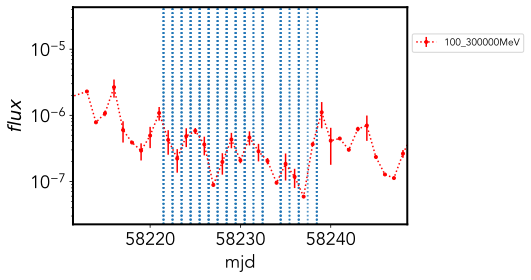

In [67]:
fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


xlabel='mjd'
ylabel='flux_1'
yerr_label='e_flux_1'
label='100_300000MeV'
save_name='PKS0736_LAT_daily_%s'%label
data_plot=PKS0736_86400_pd

ax.errorbar(data_plot[xlabel],data_plot[ylabel],yerr=data_plot[yerr_label],
            color='red',label=label,ls=':',marker='.')

for i in G0044_PKS0736_5deg['mjd']:
    ax.axvline(i,ls=':',alpha=0.2)


ax.semilogy()

#ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(bottom,top)
plt.xlim(min(G0044_PKS0736_5deg['mjd'])-10,max(G0044_PKS0736_5deg['mjd'])+10)
plt.xlabel('mjd')
plt.ylabel(r'$flux$')

#ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
plt.savefig('/Users/brettlv/Downloads/mwa/%s.png'%save_name, 
        dpi=400, transparent=False, bbox_inches='tight')
#plt.semilogy()    



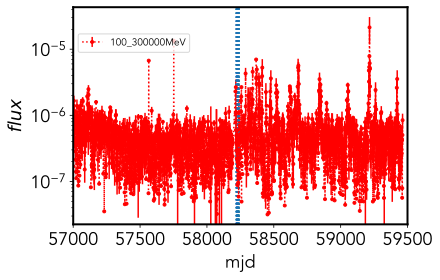

In [62]:
fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


xlabel='mjd'
ylabel='flux_1'
yerr_label='e_flux_1'
label='100_300000MeV'
save_name='PKS0736_LAT_daily_%s'%label
data_plot=PKS0736_86400_pd

ax.errorbar(data_plot[xlabel],data_plot[ylabel],yerr=data_plot[yerr_label],
            color='red',label=label,ls=':',marker='.')

for i in G0044_PKS0736_5deg['mjd']:
    ax.axvline(i,ls=':',alpha=0.2)


ax.semilogy()

#ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(bottom,top)
#plt.xlim(min(G0044_PKS0736_5deg['mjd'])-100,max(G0044_PKS0736_5deg['mjd'])+100)
plt.xlim(57000,59500)
plt.xlabel('mjd')
plt.ylabel(r'$flux$')

#ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
plt.savefig('/Users/brettlv/Downloads/mwa/%s_1.png'%save_name, 
        dpi=400, transparent=False, bbox_inches='tight')
#plt.semilogy()    



# WISE

In [50]:
PKS0736_newwise_path='/Users/brettlv/blog/IHEP_sync/data/data_PKS0736+01/PKS0736+017_table_irsa_catalog_search_results.csv'

In [51]:
PKS0736_newwise=pd.read_csv(PKS0736_newwise_path)
PKS0736_newwise=PKS0736_newwise.sort_values('mjd')

In [52]:
for i,j in zip(PKS0736_newwise['mjd'],PKS0736_newwise['w1mpro']):
    print(i,j)

56953.02249666 11.173
56953.15403664 11.144
56953.28544937 11.136
56953.28557675 11.175
56953.35128314 11.198
56953.41698947 11.19
56953.48282318 11.17
56953.54840215 11.184000000000001
56953.61410854 11.133
56953.74564854 11.184000000000001
56953.87718863 11.187999999999999
56954.00872868 11.151
57120.45952965 10.589
57120.5908151 10.456
57120.72210066 10.589
57120.85338622 10.703
57120.91909267 10.671
57120.98467177 10.693
57120.98479909 10.677999999999999
57121.05037823 10.754000000000001
57121.11608464 10.762
57121.18166374 10.732999999999999
57121.31294929 10.655999999999999
57121.44423485 10.705
57314.90216153 11.06
57315.03331987 11.114
57315.16447808 11.125
57315.29563639 11.055
57315.36121551 11.107999999999999
57315.42679469 11.059000000000001
57315.49237385 11.045
57315.49250118 11.067
57315.55808035 10.989
57315.62365939 10.901
57315.75481769 10.872
57315.88597598 10.953
57479.48826764 11.342
57479.6192987 11.360999999999999
57479.75032987 11.376
57479.81590913 11.397
57479

Text(0.5, 0, 'mjd')

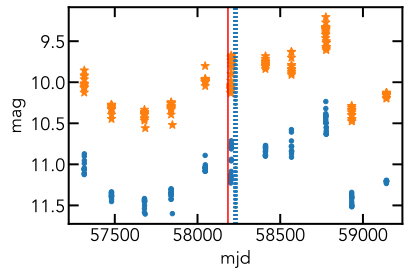

In [65]:
fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.plot(PKS0736_newwise['mjd'],PKS0736_newwise['w1mpro'],ls='',marker='.',ms=9,label='W1')
ax.plot(PKS0736_newwise['mjd'],PKS0736_newwise['w2mpro'],ls='',marker='*',ms=9,label='W2')
set_ax_tick(ax)

bottom, top = ax.set_ylim() 
if bottom < top:
    ax.set_ylim(top,bottom)
    
ax.set_xlabel('mjd')
ax.set_ylabel('mag')

for i in G0044_PKS0736_5deg['mjd']:
    ax.axvline(i,ls=':',alpha=0.1)
    
ax.axvline(58184,color='red')

plt.xlim(min(G0044_PKS0736_5deg['mjd'])-1000,max(G0044_PKS0736_5deg['mjd'])+1000)
plt.xlabel('mjd')
